<a href="https://colab.research.google.com/github/ZRooker/AI/blob/main/CIFAR10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

170498071/170498071 [==============================] - 4s 0us/step


<ipython-input-2-bb0d6cfc79b1>:8: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,i+1)


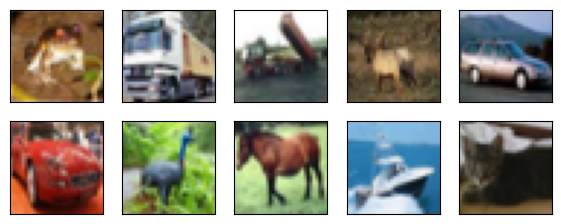

In [2]:
#Loading in our dataset of MNIST from keras
data_set = keras.datasets.cifar10.load_data()
(X_train, y_train), (X_test, y_test) = data_set

# Display random MNIST datasets
plt.subplots( figsize=(7, 7))
for i in range(10):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(X_train[i])
plt.show()

In [3]:
# Preprocess the data by scaling pixel values to a range of 0 to 1
X_train = X_train/ 255.0
X_test = X_test/ 255.0

# Define the Convolutional Neural Network (CNN)
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size = (3,3), activation = 'relu',input_shape=(32, 32,3)),
    keras.layers.MaxPooling2D(pool_size = (2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

#Initialiy I had added another convultion layer of 64, but the accuracy did not 
#increase as much as I would have liked. Instead I just upped my last layer to 
#128 to further increase and observe the complex patterns
#The layers were chosen as I wanted a convolution of 32 filters as it is sufficient
# in getting the features we need. If we increased it then the CNN could recognize 
# more complex patterns. Then we have max pooling to reduce spatial dimensions, 
# then again repeating with another 64 filters, and max pooling, now we need to 
#flatten the output of the max pooling layer and I added a dense layer of 128
#to end it we have  a dropout of .5 to prevent overfitting. Then the dense layer
#with a supermax will give us the output probabilities. 

# Compile the model with the Adam optimizer and categorical cross-entropy loss
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model on the training data; 20% being tested
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/10
1250/1250 [==============================] - 78s 61ms/step - loss: 1.5799 - accuracy: 0.4196 - val_loss: 1.2876 - val_accuracy: 0.5441
Epoch 2/10
1250/1250 [==============================] - 77s 62ms/step - loss: 1.1996 - accuracy: 0.5734 - val_loss: 1.0922 - val_accuracy: 0.6122
Epoch 3/10
1250/1250 [==============================] - 75s 60ms/step - loss: 1.0412 - accuracy: 0.6347 - val_loss: 1.0189 - val_accuracy: 0.6346
Epoch 4/10
1250/1250 [==============================] - 77s 62ms/step - loss: 0.9248 - accuracy: 0.6751 - val_loss: 0.8977 - val_accuracy: 0.6907
Epoch 5/10
1250/1250 [==============================] - 81s 64ms/step - loss: 0.8435 - accuracy: 0.7046 - val_loss: 0.8838 - val_accuracy: 0.6954
Epoch 6/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.7781 - accuracy: 0.7251 - val_loss: 0.8801 - val_accuracy: 0.6934
Epoch 7/10
1250/1250 [==============================] - 76s 61ms/step - loss: 0.7211 - accuracy: 0.7468 - val_loss: 0.8782 -

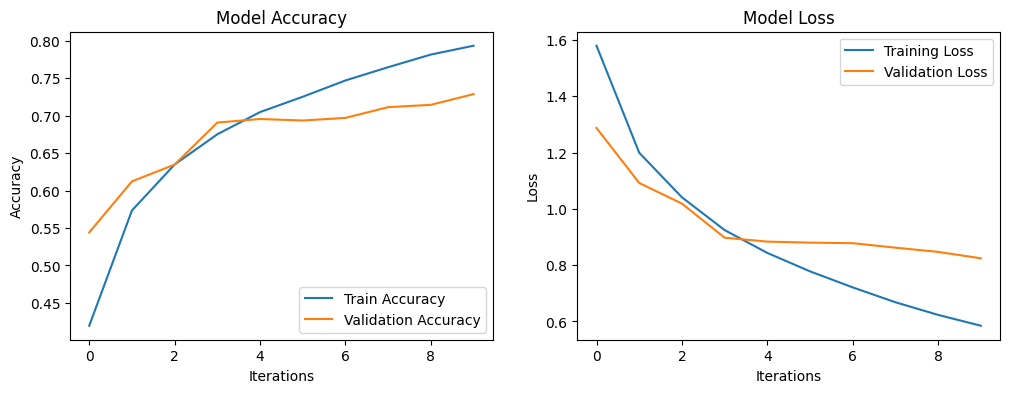

In [4]:

# Plot the training and validation accuracy vs. iterations
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Iterations')
plt.ylabel('Accuracy')
plt.legend(['Train Accuracy', 'Validation Accuracy'], loc='lower right')

# Plot the training and validation loss vs. iterations
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')

plt.show()